zang+21,kim+18のよくわからんt_0,t_eff でのfitをする。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [2]:
def single_magnification(t,t0,tE,u0):
    u = np.sqrt(u0**2 + ((t-t0)/tE)**2)
    A = (u**2 + 2)/(u*np.sqrt(u**2 +4))
    
    return A

def calc_A_j_0(t,t0,t_eff):
    Q = 1+((t-t0)/t_eff)**2
    A = 1/np.sqrt(Q)
    
    return A

def calc_A_j_1(t,t0,t_eff):
    Q = 1+((t-t0)/t_eff)**2
    A = (Q+2)/np.sqrt(Q*(Q+4))
    
    return A

def get_flux_1(t0,t_eff,time,flux,ferr):
    A_j_1 = calc_A_j_1(time,t0,t_eff)
    f1, f0 = np.polyfit(A_j_1, flux, 1,w=1/ferr)
    return f1,f0

def get_flux_0(t0,t_eff,time,flux,ferr):
    A_j_0 = calc_A_j_0(time,t0,t_eff)
    f1, f0 = np.polyfit(A_j_0, flux, 1,w=1/ferr)
    return f1,f0

def get_flux_test(t0_0,t_eff_0,t0_1,t_eff_1,time,flux,ferr):
    A_j_0 = calc_A_j_0(time,t0_0,t_eff_0)
    A_j_1 = calc_A_j_1(time,t0_1,t_eff_1)
    A = A_j_0+A_j_1
    f1, f0 = np.polyfit(A, flux, 1,w=1/ferr)
    return f1,f0
    
    
def get_chi2_A_j_1(t0,t_eff,time,flux,ferr):
    A_j_1 = calc_A_j_1(time,t0,t_eff)
    fs, fb = np.polyfit(A_j_1, flux, 1,w=1/ferr)
    model_flux = A_j_1*fs + fb
    chi2 = np.sum(((flux-model_flux)**2)/ferr)
    
    return chi2

def get_chi2_A_j_0(t0,t_eff,time,flux,ferr):
    A_j_0 = calc_A_j_0(time,t0,t_eff)
    fs, fb = np.polyfit(A_j_0, flux, 1,w=1/ferr)
    model_flux = A_j_0*fs + fb
    chi2 = np.sum(((flux-model_flux)**2)/ferr)
    
    return chi2

In [3]:
def chi2_fun_1(theta,time,flux,ferr):
    return get_chi2_A_j_1(theta[0],theta[1],time,flux,ferr)

def single_fit_A_j_1(time,flux,ferr,t0_init,teff_init):
    
    initial_guess = [t0_init, teff_init]
    
    result = op.minimize(chi2_fun_1, x0=initial_guess,args=(time,flux,ferr),method='Nelder-Mead')
    
    (fit_t_0, fit_t_eff) = result.x
    result_list = {'t_0':fit_t_0, 't_eff': fit_t_eff}
    return fit_t_0, fit_t_eff

def chi2_fun_0(theta,time,flux,ferr):
    return get_chi2_A_j_0(theta[0],theta[1],time,flux,ferr)

def single_fit_A_j_0(time,flux,ferr,t0_init,teff_init):
    
    initial_guess = [t0_init, teff_init]
    
    result = op.minimize(chi2_fun_0, x0=initial_guess,args=(time,flux,ferr),method='Nelder-Mead')
    
    (fit_t_0, fit_t_eff) = result.x
    result_list = {'t_0':fit_t_0, 't_eff': fit_t_eff}
    return fit_t_0, fit_t_eff

In [4]:
t_0 = 3000
t_E = 50
u_0 = 0.01
t_eff = u_0*t_E
fs = 30000
fb = 20000

t_in = np.linspace(2500,3500,10000)
data_flux = single_magnification(t_in,t_0,t_E,u_0)*fs + fb + np.random.normal(0,500,10000)
data_ferr = 5000*np.ones(10000)

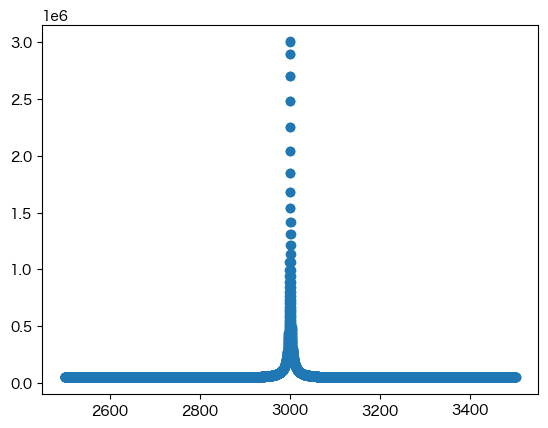

In [5]:
plt.scatter(t_in,data_flux)
plt.show()

In [6]:
t_0_init = 2990
t_eff_init = 1

fit_t0_1, fit_teff_1 = single_fit_A_j_1(t_in,data_flux,data_ferr,t_0_init,t_eff_init)
fit_f1_1,fit_f0_1 = get_flux_1(fit_t0_1,fit_teff_1,t_in,data_flux,data_ferr)

f_model_1 = fit_f1_1*calc_A_j_1(t_in,fit_t0_1,fit_teff_1) + fit_f0_1

fit_t0_0, fit_teff_0 = single_fit_A_j_0(t_in,data_flux,data_ferr,t_0_init,t_eff_init)
fit_f1_0,fit_f0_0 = get_flux_0(fit_t0_1,fit_teff_1,t_in,data_flux,data_ferr)

f_model_0 = fit_f1_0*(calc_A_j_0(t_in,fit_t0_0,fit_teff_0)) + fit_f0_0

t_ref = (t_in-fit_t0_1)/fit_teff_1

fit_f1_test,fit_f0_test = get_flux_test(fit_t0_0,fit_teff_0,fit_t0_1,fit_teff_1,t_in,data_flux,data_ferr)
f_model_test = fit_f1_test*(calc_A_j_0(t_in,fit_t0_0,fit_teff_0)+calc_A_j_1(t_in,fit_t0_1,fit_teff_1)) + fit_f0_test

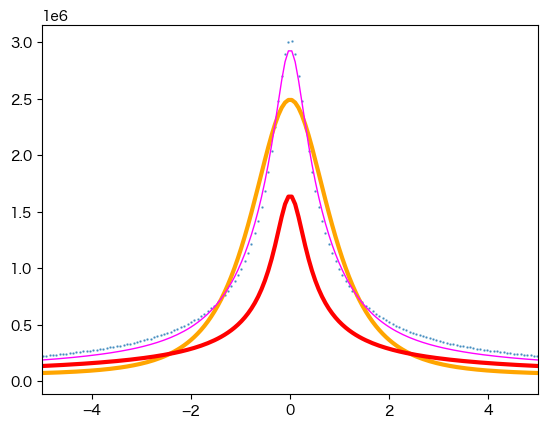

In [7]:
plt.plot(t_ref,f_model_1,c="orange",lw=3)
plt.plot(t_ref,f_model_0,c="red",lw=3)
plt.plot(t_ref,f_model_test,c="magenta",lw=1)
plt.scatter(t_ref,data_flux,s=0.5,alpha=0.7)


plt.xlim(-5,5)

plt.show()

よくわからんけどA_j_1とA_j_0を足した増光率でf0とf1をフィットしたらうまく行った。この下で、足した状態でt0とteffもfitするようなコードを書く。

In [8]:
def calc_A_comb(time,t0,t_eff):
    A_j_0 = calc_A_j_0(time,t0,t_eff)
    A_j_1 = calc_A_j_1(time,t0,t_eff)
    A = A_j_0 + A_j_1
    
    return A
    

def get_chi2_comb(t0,t_eff,time,flux,ferr):
    A_comb = calc_A_comb(time,t0,t_eff)
    fs, fb = np.polyfit(A_comb, flux, 1,w=1/ferr)
    model_flux = A_comb*fs + fb
    chi2 = np.sum(((flux-model_flux)**2)/ferr)
    
    return chi2

def get_flux_comb(t0,t_eff,time,flux,ferr):
    A_j_0 = calc_A_j_0(time,t0,t_eff)
    A_j_1 = calc_A_j_1(time,t0,t_eff)
    A_comb = calc_A_comb(time,t0,t_eff)
    f1, f0 = np.polyfit(A_comb, flux, 1,w=1/ferr)
    return f1,f0

def chi2_fun_comb(theta,time,flux,ferr):
    return get_chi2_comb(theta[0],theta[1],time,flux,ferr)

def single_fit_comb(time,flux,ferr,t0_init,teff_init):
    
    initial_guess = [t0_init, teff_init]
    
    result = op.minimize(chi2_fun_comb, x0=initial_guess,args=(time,flux,ferr),method='Nelder-Mead')
    
    (fit_t_0, fit_t_eff) = result.x
    result_list = {'t_0':fit_t_0, 't_eff': fit_t_eff}
    return fit_t_0, fit_t_eff

In [9]:
t_0_init = 3000
t_eff_init = 0.5

fit_t0_comb, fit_teff_comb = single_fit_comb(t_in,data_flux,data_ferr,t_0_init,t_eff_init)
fit_f1_comb,fit_f0_comb = get_flux_comb(fit_t0_comb,fit_teff_comb,t_in,data_flux,data_ferr)

f_model_comb = fit_f1_comb*calc_A_comb(t_in,fit_t0_comb,fit_teff_comb) + fit_f0_comb

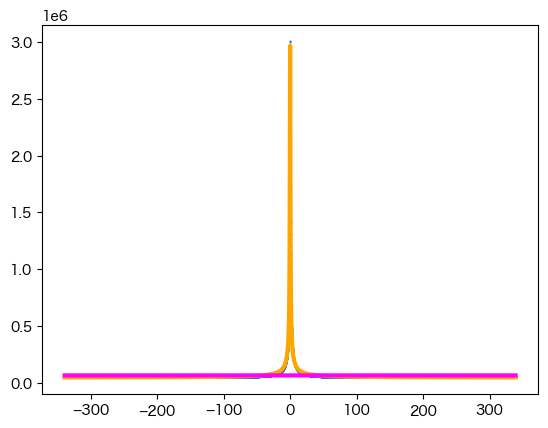

In [10]:
plt.plot(t_ref,f_model_comb,c="orange",lw=3)
plt.plot(t_ref,np.mean(data_flux)*np.ones(data_flux.shape[0]),c="magenta",lw=3)
plt.scatter(t_ref,data_flux,s=0.5,alpha=0.7)

# plt.xlim(-5,5)
plt.show()

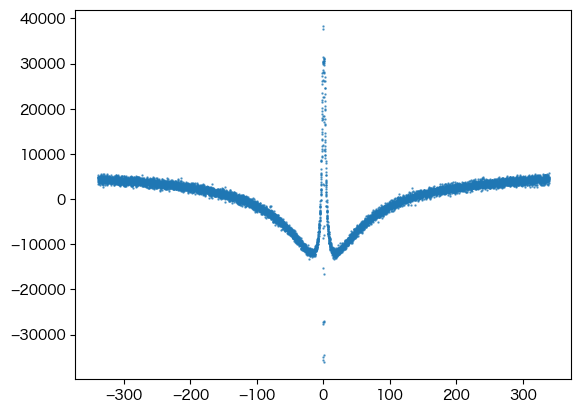

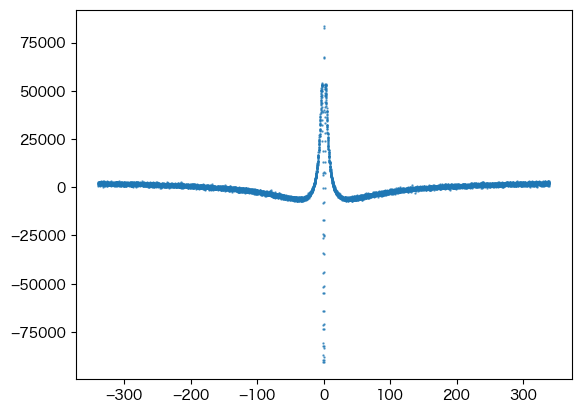

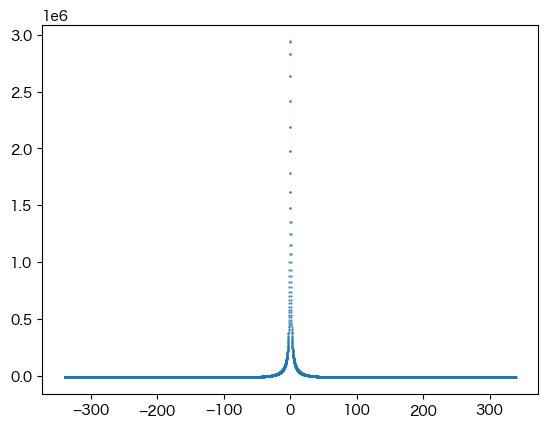

In [11]:
plt.scatter(t_ref,data_flux-f_model_comb,s=0.5,alpha=0.7)
plt.show()

plt.scatter(t_ref,data_flux-f_model_test,s=0.5,alpha=0.7)
plt.show()

plt.scatter(t_ref,data_flux-np.mean(data_flux),s=0.5,alpha=0.7)
plt.show()